In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
def findnanrows(df):
    is_NaN = df.isnull() 
    row_has_NaN = is_NaN.any(axis=1) 
    rows_with_NaN = df[row_has_NaN] 
    return rows_with_NaN

def interpolatedata(df):
    filldf = df.groupby(pd.Grouper(freq='10T')).mean()
    dfnan = findnanrows(filldf)
    print("==> %s rows have been filled <==" %len(dfnan))
    filldf = filldf.interpolate().round(2)
    return filldf

In [84]:
def loaddata(sartyear, endyear):
    urlpath = 'https://www.bgc-jena.mpg.de/wetter/'
    urllist = []
    df = pd.DataFrame()
    for year in np.arange(sartyear, endyear, 1):
        urllist.append(urlpath+"mpi_roof_"+str(year)+"a.zip")
        urllist.append(urlpath+"mpi_roof_"+str(year)+"b.zip")
    for url in urllist:
        df = df.append(pd.read_csv(url, encoding='unicode_escape', parse_dates=True, index_col="Date Time"))
    df.index.name = 'datetime'
    return df

raw_data = loaddata(sartyear=2016, endyear=2021)

/var/folders/fq/s6_sst4x3cv_zj9lkplg7f640000gn/T/ipykernel_40108/1021313106.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(url, encoding='unicode_escape', parse_dates=True, index_col="Date Time"))
/var/folders/fq/s6_sst4x3cv_zj9lkplg7f640000gn/T/ipykernel_40108/1021313106.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(url, encoding='unicode_escape', parse_dates=True, index_col="Date Time"))
/var/folders/fq/s6_sst4x3cv_zj9lkplg7f640000gn/T/ipykernel_40108/1021313106.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(url, encoding='unicode_escape', parse_dates=True, index_col="Date Time"))
/var/folders/fq/s6_sst4x3cv_zj9lkplg7f640000gn

In [85]:
# raw dataset shape
raw_data.shape

(262592, 21)

In [86]:
# NA observations
findnanrows(raw_data)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
datetime,,,,,,,,,,,,,,,,,,,,,


In [87]:
raw_data.to_csv("raw_dataset.csv")

In [88]:
df = interpolatedata(raw_data)

==> 497 rows have been filled <==


In [89]:
df.shape

(263088, 21)

In [90]:
date_range = pd.date_range(start="2016-01-01 00:10:00", end="2021-01-01 00:00:00", freq="10T")
df.insert(0, "date", date_range)

In [91]:
df = df.reset_index()

In [92]:
df = df.iloc[:, 1:]

In [93]:
df = df.set_index('date')

In [94]:
hourly_df = df.resample("60T").mean()

In [95]:
hourly_df.shape

(43849, 21)

In [97]:
hourly_df["wv (m/s)"].describe()

count    43849.000000
mean         2.057630
std          8.097044
min      -1664.906667
25%          0.995000
50%          1.716667
75%          2.751667
max         13.215000
Name: wv (m/s), dtype: float64

In [98]:
mean_wind = hourly_df["wv (m/s)"].mean()
min_wind = hourly_df["wv (m/s)"].min()
hourly_df["wv (m/s)"] = hourly_df["wv (m/s)"].replace(min_wind, mean_wind)

In [99]:
hourly_df = hourly_df.reset_index()

In [105]:
hourly_df.to_csv("hourly_df.csv")

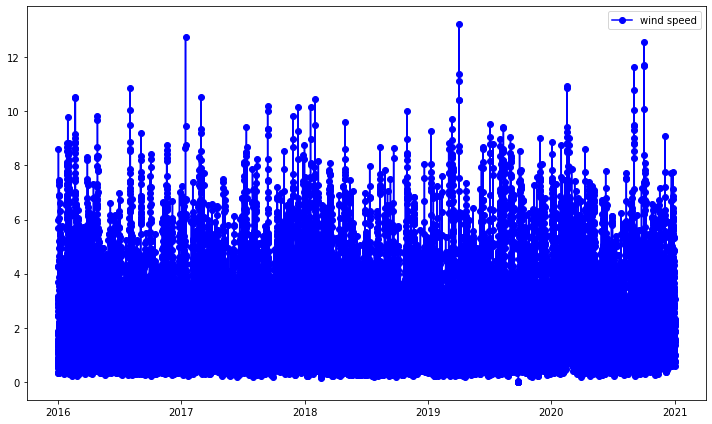

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(hourly_df['date'], hourly_df["wv (m/s)"], marker='o', linestyle='-', color='b', label='wind speed')
plt.legend()
plt.tight_layout()
plt.show()